# Regression on the tabular data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## Starting

In [2]:
df = pd.read_csv('internship_train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


<AxesSubplot: >

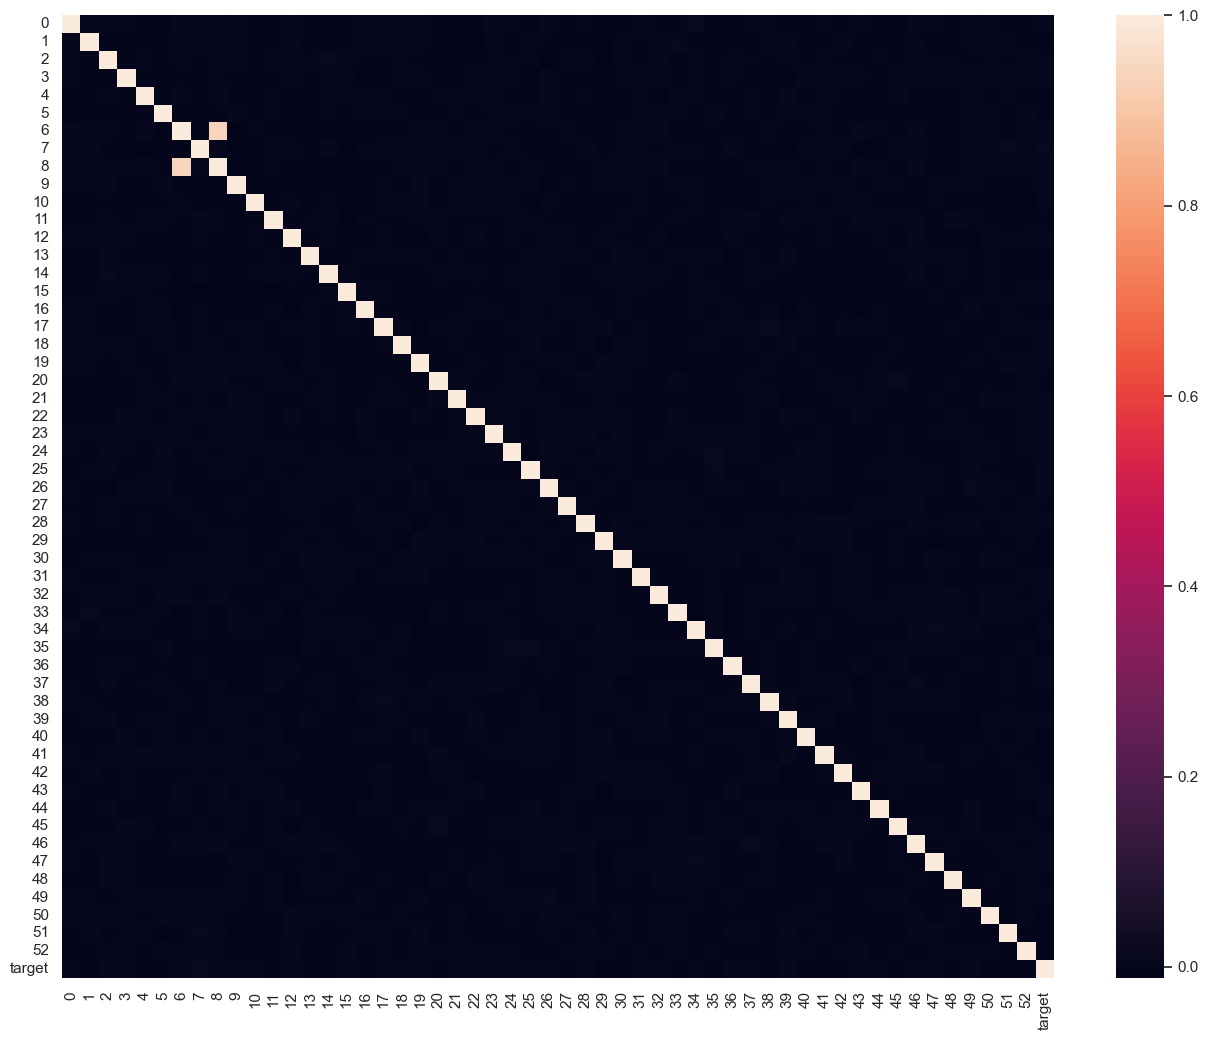

In [3]:
sns.set(rc={'figure.figsize': (16, 12.5)})
sns.heatmap(df.corr())

As can be seen, there is high correlation between 6 and 8 feature, so I'll drop one of them to train model more effective.

In [4]:
X = df.iloc[:,0:53].drop(columns = ['8'])
y = df.target

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

I'll try different algorithms for regression:

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared = False)

28.89168963676033

## KNeighborsRegressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared = False)

31.66922407767025

## DecisionTreeRegressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state = 22)
decision_tree.fit(X_train, y_train)
mean_squared_error(y_test, decision_tree.predict(X_test), squared = False)

0.008750014748391675

As can be seen, DecisionTreeRegressor shows the best perfomance. Let's tune this model.

## Tuning

In [9]:
from sklearn.model_selection import RandomizedSearchCV

parameters={'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

decision_tree = DecisionTreeRegressor(random_state = 22)
tuning_model=RandomizedSearchCV(decision_tree, param_distributions = parameters, scoring = 'neg_root_mean_squared_error')
tuning_model.fit(X_train, y_train)

best_decision_tree = tuning_model.best_estimator_

In [10]:
print('RMSE:', mean_squared_error(y_test, tuning_model.predict(X_test), squared = False))
print('R-Squared score:', best_decision_tree.score(X_test, y_test))

RMSE: 0.007878018307100063
R-Squared score: 0.99999992554432


Almost ideal scores.

## Prediction

In [11]:
test_data = pd.read_csv('internship_hidden_test.csv')

X_t = test_data.iloc[:,0:53].drop(columns = ['8'])

test_data['target'] = best_decision_tree.predict(X_t)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191,11.225552
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604,79.695245
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030,7.493598
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819,38.507522
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015,64.756486


In [12]:
test_data.to_csv('test_w_pred.csv', index=False)